Importing Libraries

In [32]:
# For data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

# Train, test, validation splits

from sklearn.model_selection import TimeSeriesSplit


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose 

Reading in CSV/Data Cleaning

In [9]:
df = pd.read_csv("ad_viz_plotval_data.csv")
df.head(5)

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,60070008,3,24,ug/m3 SC,22,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2021,AQS,60070008,3,21,ug/m3 SC,19,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2021,AQS,60070008,3,19,ug/m3 SC,18,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2021,AQS,60070008,3,10,ug/m3 SC,9,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/05/2021,AQS,60070008,3,12,ug/m3 SC,11,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


In [14]:
df.dtypes

Date                             datetime64[ns]
Source                                   object
Site ID                                   int64
POC                                       int64
Daily Mean PM10 Concentration             int64
UNITS                                    object
DAILY_AQI_VALUE                           int64
Site Name                                object
DAILY_OBS_COUNT                           int64
PERCENT_COMPLETE                        float64
AQS_PARAMETER_CODE                        int64
AQS_PARAMETER_DESC                       object
CBSA_CODE                               float64
CBSA_NAME                                object
STATE_CODE                                int64
STATE                                    object
COUNTY_CODE                               int64
COUNTY                                   object
SITE_LATITUDE                           float64
SITE_LONGITUDE                          float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [41]:
#new data frame with only relevant data

df_PM10 = df[["Date", "Daily Mean PM10 Concentration"]]
df_PM10 = df_PM10.groupby(df_PM10["Date"])["Daily Mean PM10 Concentration"].sum()
df_PM10.head()

Date
2021-01-01    1454
2021-01-02    1533
2021-01-03    1578
2021-01-04    2474
2021-01-05    1479
Name: Daily Mean PM10 Concentration, dtype: int64

In [42]:
# drop null values
df_PM10.dropna()

Date
2021-01-01    1454
2021-01-02    1533
2021-01-03    1578
2021-01-04    2474
2021-01-05    1479
              ... 
2021-12-27     779
2021-12-28     595
2021-12-29     529
2021-12-30     924
2021-12-31    1078
Name: Daily Mean PM10 Concentration, Length: 365, dtype: int64

EDA

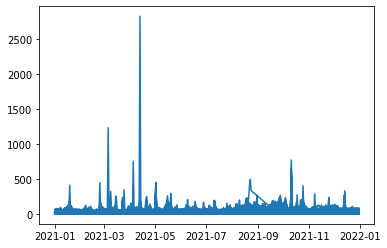

In [21]:
plt.plot(df_PM10['Date'], df_PM10['Daily Mean PM10 Concentration'])
plt.show()

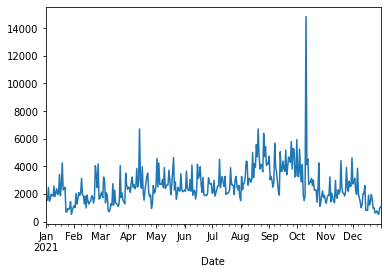

<Figure size 3000x2500 with 0 Axes>

In [40]:
df_PM10.plot()

figure(figsize=(30, 25), dpi=100)

plt.show()

Checking Stationarity/Differencing

Model Building